___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [17]:
## Import Libraies


## main libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

#!pip install squarify
import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins

## pre-processing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer, KNNImputer

## feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

## scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## ann
from sklearn.neural_network import MLPRegressor

## classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from xgboost import XGBClassifier, plot_importance

## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

## MLearning
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import GaussianNB


#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

import ipywidgets
from ipywidgets import interact

#!pip install wordcloud
from wordcloud import WordCloud

#!pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])

## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [18]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [19]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

In [20]:
df0 = pd.read_csv('creditcard.csv')
df = df0.copy()
df.head(3) 

Time     V1     V2    V3    V4     V5     V6     V7    V8     V9    V10  \
0 0.000 -1.360 -0.073 2.536 1.378 -0.338  0.462  0.240 0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166 0.448  0.060 -0.082 -0.079 0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773 0.380 -0.503  1.800  0.791 0.248 -1.515  0.208   

     V11    V12    V13    V14   V15    V16    V17    V18    V19    V20    V21  \
0 -0.552 -0.618 -0.991 -0.311 1.468 -0.470  0.208  0.026  0.404  0.251 -0.018   
1  1.613  1.065  0.489 -0.144 0.636  0.464 -0.115 -0.183 -0.146 -0.069 -0.226   
2  0.625  0.066  0.717 -0.166 2.346 -2.890  1.110 -0.121 -2.262  0.525  0.248   

     V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

### Exploratory Data Analysis

In [21]:
df.shape

(284807, 31)

In [22]:
df.tail(3)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
284804 172788.000  1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708   
284805 172788.000 -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679   
284806 172792.000 -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415   

          V9    V10    V11    V12    V13    V14   V15    V16    V17   V18  \
284804 0.432 -0.485  0.412  0.063 -0.184 -0.511 1.329  0.141  0.314 0.396   
284805 0.392 -0.399 -1.934 -0.963 -1.042  0.450 1.963 -0.609  0.510 1.114   
284806 0.486 -0.915 -1.040 -0.032 -0.188 -0.084 0.041 -0.303 -0.660 0.167   

          V19   V20   V21   V22    V23   V24    V25    V26    V27    V28  \
284804 -0.577 0.001 0.232 0.578 -0.038 0.640  0.266 -0.087  0.004 -0.027   
284805  2.898 0.127 0.265 0.800 -0.163 0.123 -0.569  0.547  0.109  0.105   
284806 -0.256 0.383 0.261 0.643  0.377 0.009 -0.474 -0.818 -0.002  0.014   

        Amount  Class  
284804  67.880      0  
284805  10.000      0  
284806 217.000      0

In [23]:
df.sample(3)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
30963   36155.000 -0.987  0.942  0.977  1.422 -0.220  0.038  0.438  0.513   
176076 122616.000  2.111 -0.858 -0.914 -0.477 -0.643 -0.332 -0.624 -0.065   
142905  85008.000 -0.341  0.900  0.332  0.813  3.184  3.825  0.221  0.577   

           V9    V10    V11    V12    V13    V14   V15    V16    V17    V18  \
30963  -0.502 -0.390 -0.750  0.376  0.047  0.326 0.176 -1.089  0.790 -0.625   
176076 -0.092  0.790 -1.406 -0.284 -0.263  0.013 0.053 -1.239 -0.146  0.606   
142905 -0.820  0.411 -0.041 -0.983 -0.086 -1.472 0.855  1.325 -0.585  1.137   

          V19    V20    V21    V22    V23   V24    V25    V26    V27    V28  \
30963   0.697  0.239  0.067  0.250  0.068 0.081 -0.035 -0.225  0.284  0.119   
176076 -0.387 -0.558 -0.884 -2.107  0.592 0.375 -0.749  0.037 -0.045 -0.036   
142905 -0.826  0.164  0.030  0.230 -0.281 0.901 -0.396 -0.098 -0.266 -0.266   

        Amount  Class  
30963   82.190      0  
176076  35.350      0  
142905   0.760      0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
df.describe().T

count      mean       std      min       25%       50%        75%  \
Time   284807.000 94813.860 47488.146    0.000 54201.500 84692.000 139320.500   
V1     284807.000     0.000     1.959  -56.408    -0.920     0.018      1.316   
V2     284807.000     0.000     1.651  -72.716    -0.599     0.065      0.804   
V3     284807.000    -0.000     1.516  -48.326    -0.890     0.180      1.027   
V4     284807.000     0.000     1.416   -5.683    -0.849    -0.020      0.743   
V5     284807.000     0.000     1.380 -113.743    -0.692    -0.054      0.612   
V6     284807.000     0.000     1.332  -26.161    -0.768    -0.274      0.399   
V7     284807.000    -0.000     1.237  -43.557    -0.554     0.040      0.570   
V8     284807.000     0.000     1.194  -73.217    -0.209     0.022      0.327   
V9     284807.000    -0.000     1.099  -13.434    -0.643    -0.051      0.597   
V10    284807.000     0.000     1.089  -24.588    -0.535    -0.093      0.454   
V11    284807.000     0.000     1.021   -4.797    -0.762    -0.033      0.740   
V12    284807.000    -0.000     0.999  -18.684    -0.406     0.140      0.618   
V13    284807.000     0.000     0.995   -5.792    -0.649    -0.014      0.663   
V14    284807.000     0.000     0.959  -19.214    -0.426     0.051      0.493   
V15    284807.000     0.000     0.915   -4.499    -0.583     0.048      0.649   
V16    284807.000     0.000     0.876  -14.130    -0.468     0.066      0.523   
V17    284807.000    -0.000     0.849  -25.163    -0.484    -0.066      0.400   
V18    284807.000     0.000     0.838   -9.499    -0.499    -0.004      0.501   
V19    284807.000     0.000     0.814   -7.214    -0.456     0.004      0.459   
V20    284807.000     0.000     0.771  -54.498    -0.212    -0.062      0.133   
V21    284807.000     0.000     0.735  -34.830    -0.228    -0.029      0.186   
V22    284807.000    -0.000     0.726  -10.933    -0.542     0.007      0.529   
V23    284807.000     0.000     0.624  -44.808    -0.162    -0.011      0.148   
V24    284807.000     0.000     0.606   -2.837    -0.355     0.041      0.440   
V25    284807.000     0.000     0.521  -10.295    -0.317     0.017      0.351   
V26    284807.000     0.000     0.482   -2.605    -0.327    -0.052      0.241   
V27    284807.000    -0.000     0.404  -22.566    -0.071     0.001      0.091   
V28    284807.000    -0.000     0.330  -15.430    -0.053     0.011      0.078   
Amount 284807.000    88.350   250.120    0.000     5.600    22.000     77.165   
Class  284807.000     0.002     0.042    0.000     0.000     0.000      0.000   

              max  
Time   172792.000  
V1          2.455  
V2         22.058  
V3          9.383  
V4         16.875  
V5         34.802  
V6         73.302  
V7        120.589  
V8         20.007  
V9         15.595  
V10        23.745  
V11        12.019  
V12         7.848  
V13         7.127  
V14        10.527  
V15         8.878  
V16        17.315  
V17         9.254  
V18         5.041  
V19         5.592  
V20        39.421  
V21        27.203  
V22        10.503  
V23        22.528  
V24         4.585  
V25         7.520  
V26         3.517  
V27        31.612  
V28        33.848  
Amount  25691.160  
Class       1.000

In [26]:
df.duplicated().sum()

1081

In [27]:
first_looking(df)
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)

Shape:(284807, 31)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 1

We have a classification problem.
We are going to make classification on the target variable "class".
And we will build a model to get the best classification on the "class" column.
Because of that we are going to look at the balance of "class" column.
The dataset has 31 columns and 283726 observations after dropping of duplicated observations.
All columns contain numerical values.
There seems to be no missing value.

Feature-Target Examination

Target

In [29]:
target = "class"
cprint(f"Have a first look to {target}", "cyan", "on_grey", attrs=["bold"])
summary(target)

Have a first look to class
Column:  class
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
0    283253
1       473
Name: class, dtype: int64
****************************************************************************************************


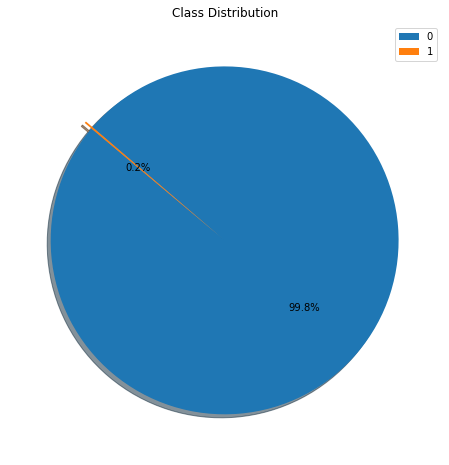

In [30]:
%matplotlib inline
plt.figure(figsize=(8, 8))

explode = [0, 0.05]
plt.pie(df[target].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

'class' column has binary type values.
We have an imbalanced data. Class frequencies of the target variable are quite imbalanced.
Almost 0.17 % of the transactions are fraudulent(473).
Almost 99.83 % of the transactions are non-fraudulent(283253).

In [31]:
df.groupby(target).mean()

time     v1     v2     v3     v4     v5     v6     v7     v8  \
class                                                                     
0     94835.058  0.013 -0.010  0.013 -0.010  0.007  0.001  0.010 -0.002   
1     80450.514 -4.498  3.406 -6.730  4.473 -2.957 -1.433 -5.176  0.953   

          v9    v10    v11    v12    v13    v14    v15    v16    v17    v18  \
class                                                                         
0      0.003  0.008 -0.006  0.009  0.001  0.012  0.001  0.008  0.011  0.005   
1     -2.522 -5.453  3.716 -6.103 -0.094 -6.836 -0.073 -4.001 -6.463 -2.157   

         v19    v20    v21    v22    v23    v24    v25   v26   v27   v28  \
class                                                                      
0     -0.001 -0.000 -0.001 -0.000  0.000  0.000 -0.000 0.000 0.001 0.000   
1      0.669  0.405  0.467  0.087 -0.096 -0.107  0.041 0.050 0.214 0.078   

       amount  
class          
0      88.414  
1     123.872

In [32]:
cprint('Descriptive statistics according to the "class==1, Fraudulent"',"blue","on_grey", attrs=["bold"])
df[df[target] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==1, Fraudulent"


In [33]:
cprint('Descriptive statistics according to the "class==0, Reliable"',"blue","on_grey", attrs=["bold"])
df[df[target] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==0, Reliable"


Features

In [34]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [35]:
feature_col = "time"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to time
Column:  time
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  124592
****************************************************************************************************
Value counts: 
3767.000      21
3770.000      20
19912.000     19
3750.000      19
73885.000     17
              ..
127732.000     1
62217.000      1
127739.000     1
127741.000     1
172792.000     1
Name: time, Length: 124592, dtype: int64
****************************************************************************************************


In [37]:
#pd.crosstab(df['time'], df[target]).iplot(kind='bar', title = 'time and target')

"amount"

In [38]:
feature_col = "amount"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to amount
Column:  amount
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  32767
****************************************************************************************************
Value counts: 
1.000      13566
1.980       6044
0.890       4871
9.990       4738
15.000      3280
           ...  
526.600        1
248.160        1
492.650        1
811.500        1
95.630         1
Name: amount, Length: 32767, dtype: int64
****************************************************************************************************


all other "v" values

In [39]:
skew_vals = df.drop("class", axis=1).skew().sort_values(ascending=False)
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

amount   16.979
v28      11.555
v7        2.890
v21       2.820
v6        1.830
v10       1.253
v27      -0.754
v16      -1.051
v14      -1.919
v20      -2.043
v3       -2.152
v12      -2.199
v5       -2.414
v1       -3.273
v17      -3.690
v2       -4.695
v23      -5.867
v8       -8.311
dtype: float64

Features from V1 to V28 are the principal components obtained with PCA.

The dataset is too large. Let's take a look at how the distribution of class=1 and class=0 by quartiles is shaped.

In [46]:
def transaction_transformer(price):
    if price <= 5.600:
        return 'Q-1'
    if 5.600 < price <= 22.700:
        return 'Q-2'
    if 22.700 < price <= 75.510:
        return 'Q-3'
    else:
        return 'Q-4'

In [47]:
df['transaction_class'] = df['amount'].apply(transaction_transformer)

In [48]:
fig = px.pie(df, values = df[df['class']==0]['transaction_class'].value_counts(), 
             names = df[df['class']==0]['transaction_class'].value_counts().index, 
             title = 'transaction_class & class==0 Distribution')
fig.show()

In [49]:
fig = px.pie(df, values = df[df['class']==1]['transaction_class'].value_counts(), 
             names = df[df['class']==1]['transaction_class'].value_counts().index, 
             title = 'transaction_class & class==1 Distribution')
fig.show()

In [50]:
print('Number of fraudulent transactions for Q-1      : ', df[(df['class']==1) & (df['transaction_class']=='Q-1')]['class'].sum())
print('Total amount of fraudulent transactions for Q-1: ', df[(df['class']==1) & (df['transaction_class']=='Q-1')]['amount'].sum())
print('Mean amount of fraudulent transactions for Q-1 : ', df[(df['class']==1) & (df['transaction_class']=='Q-1')]['amount'].mean())

Number of fraudulent transactions for Q-1      :  213
Total amount of fraudulent transactions for Q-1:  251.73000000000002
Mean amount of fraudulent transactions for Q-1 :  1.181830985915493


In [51]:
print('Number of fraudulent transactions for Q-2      : ', df[(df['class']==1) & (df['transaction_class']=='Q-2')]['class'].sum())
print('Total amount of fraudulent transactions for Q-2: ', df[(df['class']==1) & (df['transaction_class']=='Q-2')]['amount'].sum())
print('Mean amount of fraudulent transactions for Q-2 : ', df[(df['class']==1) & (df['transaction_class']=='Q-2')]['amount'].mean())

Number of fraudulent transactions for Q-2      :  49
Total amount of fraudulent transactions for Q-2:  591.53
Mean amount of fraudulent transactions for Q-2 :  12.07204081632653


In [52]:
print('Number of fraudulent transactions for Q-3      : ', df[(df['class']==1) & (df['transaction_class']=='Q-3')]['class'].sum())
print('Total amount of fraudulent transactions for Q-3: ', df[(df['class']==1) & (df['transaction_class']=='Q-3')]['amount'].sum())
print('Mean amount of fraudulent transactions for Q-3 : ', df[(df['class']==1) & (df['transaction_class']=='Q-3')]['amount'].mean())

Number of fraudulent transactions for Q-3      :  41
Total amount of fraudulent transactions for Q-3:  1733.79
Mean amount of fraudulent transactions for Q-3 :  42.28756097560976


In [53]:
print('Number of fraudulent transactions for Q-4      : ', df[(df['class']==1) & (df['transaction_class']=='Q-4')]['class'].sum())
print('Total amount of fraudulent transactions for Q-4: ', df[(df['class']==1) & (df['transaction_class']=='Q-4')]['amount'].sum())
print('Mean amount of fraudulent transactions for Q-4 : ', df[(df['class']==1) & (df['transaction_class']=='Q-4')]['amount'].mean())

Number of fraudulent transactions for Q-4      :  170
Total amount of fraudulent transactions for Q-4:  56014.34
Mean amount of fraudulent transactions for Q-4 :  329.4961176470588


In [54]:
df.drop(['transaction_class'], axis = 1, inplace = True)

As seen above, there are fraudulent transactions in every quarter.
Q-1 has the highest number of transactions with 213 transactions.
Q-4 has the highest amount with 56014.34 amount.

Correlation

In [40]:
def color(val):
    if val > 0.8 and val < 0.99:
        color = 'red'
    elif val == 1:
        color = "white"
    else:
        color = 'black'
    return f'color: {color}'

df.corr().style.applymap(color)

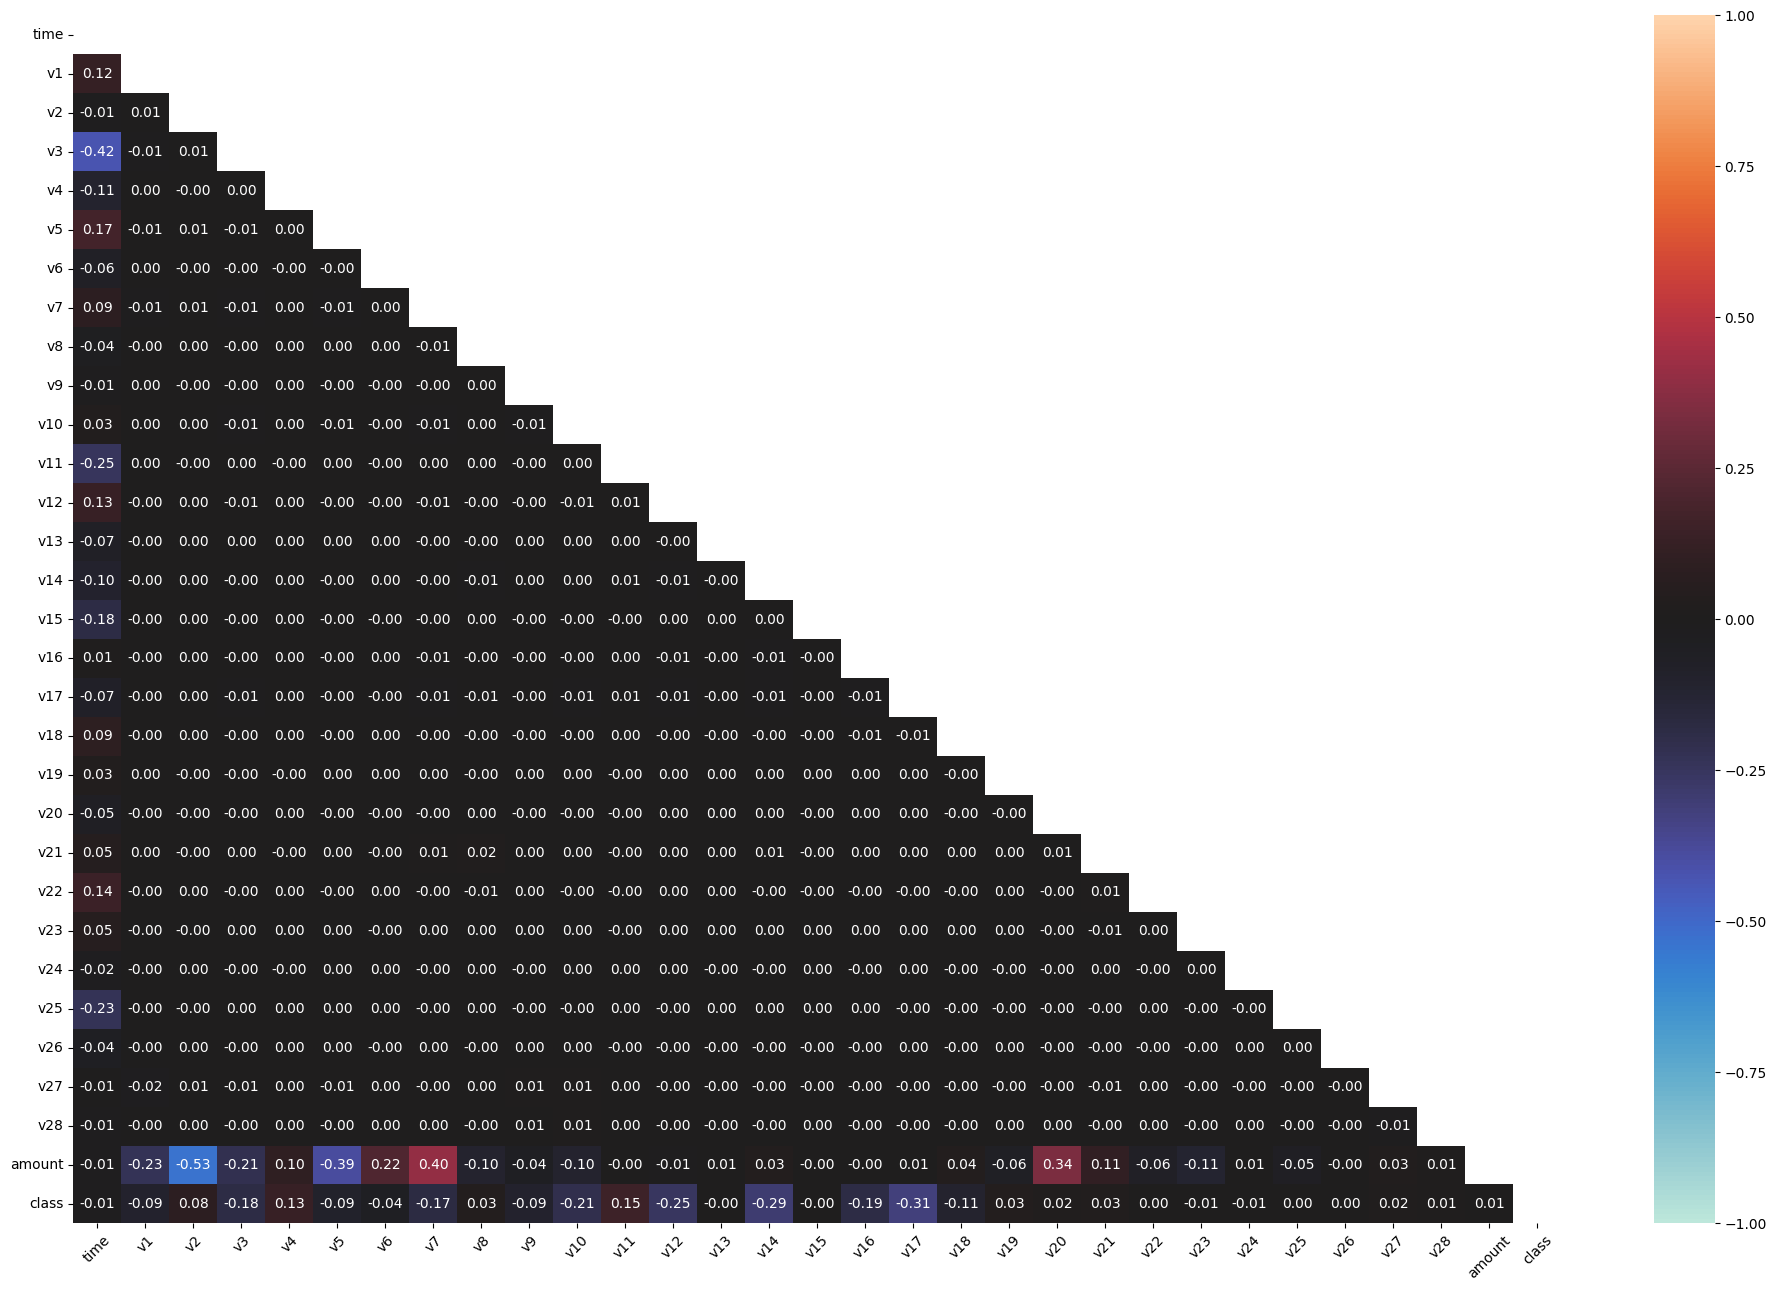

In [41]:
%matplotlib inline
matrix = np.triu(df.corr())
fig,ax = plt.subplots(figsize=(24, 16),dpi=100)
sns.heatmap (df.corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0,mask=matrix)
plt.xticks(rotation = 45);

Multicollinearity Control

In [42]:
multicolinearity_control(df)

There is NO multicollinearity problem.


In [55]:
df.corr()['class'].sort_values().drop('class').iplot(kind = 'barh', title = 'Correlation Between the Columns');

Based on the examinations made above,

There is no multicollinearity problem among the features.
We have weak level correlation between the features and the target column.
Also there is weak level correlation between the columns.

Handle with Skewness

In [44]:
df_skeweds = df.drop(target, axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.8 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1       -3.273
v2       -4.695
v3       -2.152
v5       -2.414
v6        1.830
v7        2.890
v8       -8.311
v10       1.253
v12      -2.199
v14      -1.919
v16      -1.051
v17      -3.690
v20      -2.043
v21       2.820
v23      -5.867
v28      11.555
amount   16.979
dtype: float64

In [45]:
for i in df_skeweds:
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -3.27, highly skewed.
Skewness: -4.7, highly skewed.
Skewness: -2.15, highly skewed.
Skewness: -2.41, highly skewed.
Skewness: 1.83, highly skewed.
Skewness: 2.89, highly skewed.
Skewness: -8.31, highly skewed.
Skewness: 1.25, moderately skewed.
Skewness: -2.2, highly skewed.
Skewness: -1.92, highly skewed.
Skewness: -3.69, highly skewed.
Skewness: -2.04, highly skewed.
Skewness: 2.82, highly skewed.
Skewness: -5.87, highly skewed.
Skewness: 11.56, highly skewed.
Skewness: 16.98, highly skewed.


### Data Cleaning
Check Missing Values and Outliers

In [56]:
cprint("Missing Values","green","on_red", attrs=["bold"])
missing_values(df)

Missing Values


Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

There seems to be no missing value.

Boxplots


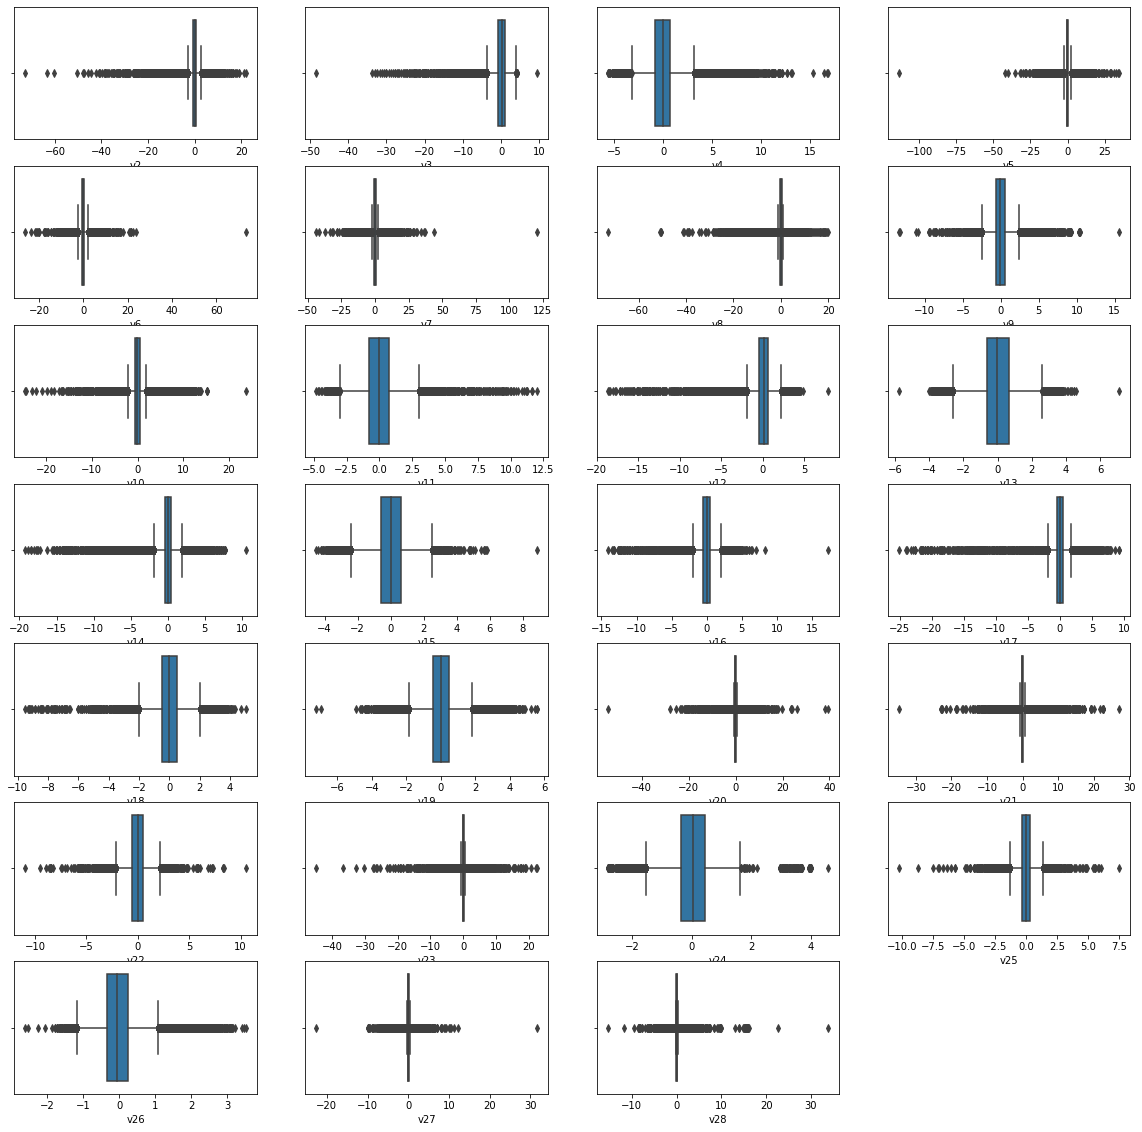

In [57]:
cprint("Boxplots","green","on_red", attrs=["bold"])
%matplotlib inline
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[2:29]:
    index += 1
    plt.subplot(7,4,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

Boxplots


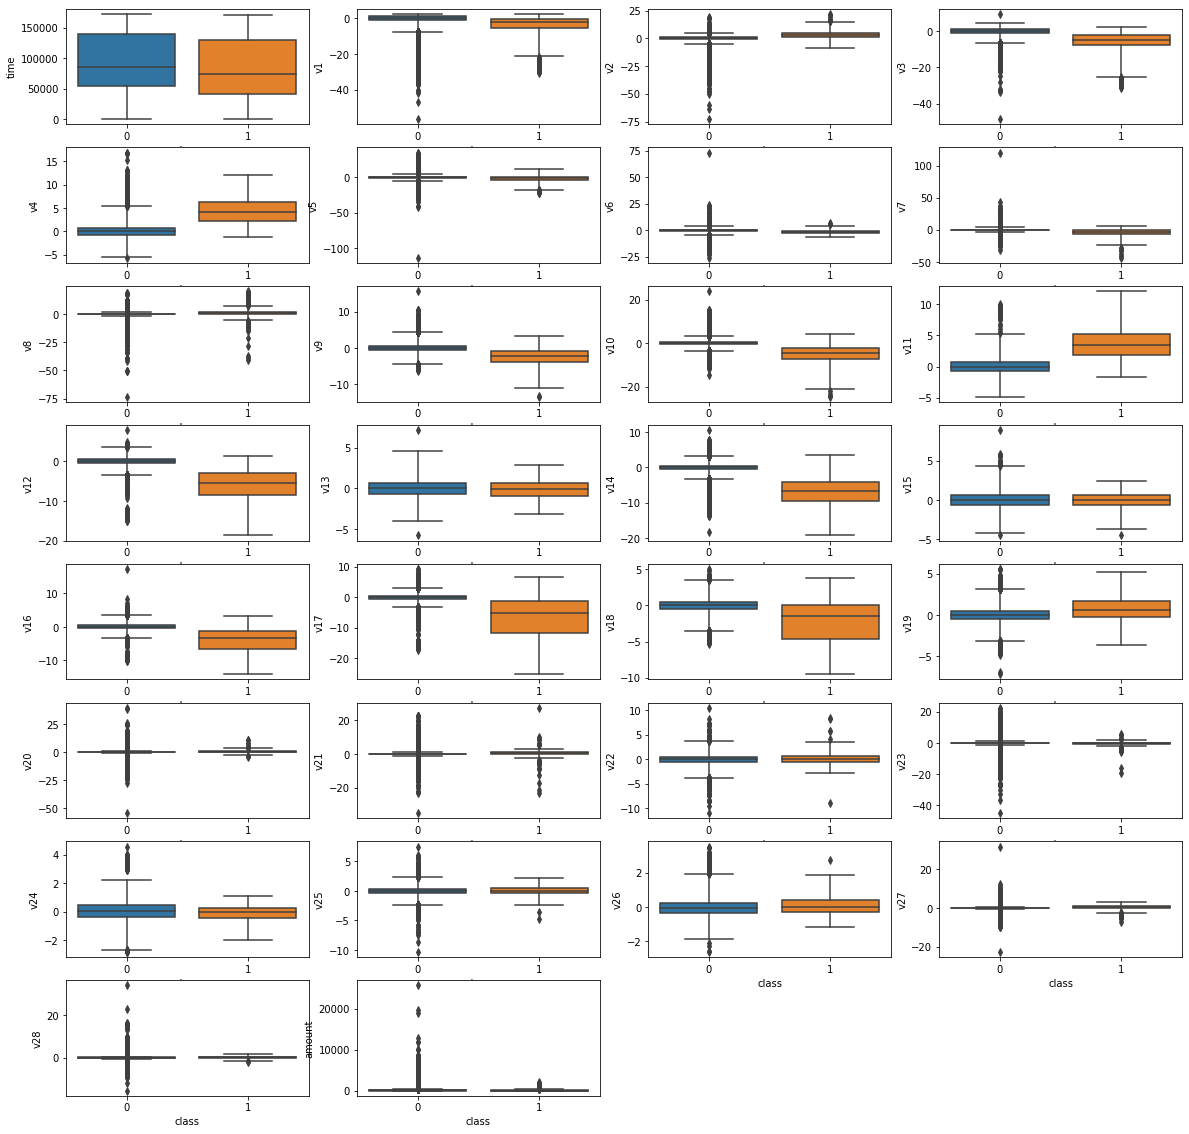

In [58]:
cprint("Boxplots","green","on_red", attrs=["bold"])
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:30]:
    index += 1
    plt.subplot(8,4,index)
    sns.boxplot(y = feature, x = "class", data = df, whis=3)

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [61]:
# make_dtype_object = df[['categorical1','categorical2']].astype('object')  # if we have features need to be dummy!!!

X_numerical = df.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df.drop(target, axis=1).select_dtypes('object')

if (df.dtypes==object).any():
    dummied = pd.get_dummies(X_categorical, drop_first=True)
    X = pd.concat([X_numerical, dummied[dummied.columns]], axis=1)
    
else:
    X = df.drop(target, axis=1).astype('float64')

y = df[target]

##################################Train - Test Split#############################################
## Train - Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.20, 
                                                    random_state=42)

###################################Scaling############################################
## Scaling

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
pd.DataFrame(X_train_scaled, columns=X.columns).head()

time     v1     v2     v3     v4     v5     v6     v7    v8     v9    v10  \
0  1.045  1.147 -1.042 -1.429 -1.818  0.727  2.696 -1.489 0.736 -1.153  1.463   
1 -0.299 -0.678  0.992  0.395 -0.026 -0.301 -0.728  0.176 0.629 -1.156 -0.448   
2  0.678  0.978  0.016 -1.387  0.093  0.851  0.459 -0.020 0.154  0.262 -0.462   
3 -0.075  0.928  0.195  0.209  2.740  0.032  0.772 -0.614 0.200  0.625  1.071   
4 -1.377  0.695 -0.676  0.364 -1.091 -0.883  0.210 -1.003 0.182 -1.912  1.393   

     v11    v12   v13    v14    v15    v16    v17    v18    v19    v20    v21  \
0 -0.231 -0.711 0.366 -0.327  0.311 -0.663  0.453 -0.219 -0.392 -0.427 -0.209   
1  1.411  1.776 1.263  0.906 -0.292  0.449 -0.314 -0.413  0.481 -0.090 -0.332   
2  1.505  1.047 0.479 -0.721  1.054 -0.319  0.942 -0.190 -1.223 -0.278  0.405   
3  1.313 -1.789 2.193  1.301 -2.229  1.537 -0.563  0.982 -2.082 -0.301  0.191   
4  1.706  0.014 0.332 -0.045  0.517 -0.757  0.935 -0.769 -0.728 -0.477 -0.474   

     v22    v23    v24    v25    v26    v27    v28  amount  
0 -0.068  0.445  1.130 -0.420 -0.331  0.093 -0.156  -0.229  
1 -1.307  0.518  0.851 -1.367 -0.554 -0.050  0.154  -0.331  
2  1.513 -0.071 -2.789  0.203  0.015  0.111 -0.166  -0.299  
3  0.967  0.279  1.160 -0.408 -0.021 -0.050 -0.120  -0.289  
4 -0.879  0.404 -0.568 -0.124 -0.914  0.156  0.037  -0.262

In [64]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [65]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

In [66]:
df_outlier = df.copy()       #Let's create a new df before outlier operation.

In [67]:
cprint("Shape of new df before outlier check",'green', 'on_red', attrs=["bold"])
df_outlier.shape

Shape of new df before outlier check


(283726, 31)

In [68]:
cprint("Value counts of 'class' column before outlier check",'green', 'on_red', attrs=["bold"])
df_outlier['class'].value_counts(dropna=False)

Value counts of 'class' column before outlier check


0    283253
1       473
Name: class, dtype: int64

In [69]:
cprint("Missing value control before outlier check",'green', 'on_red', attrs=["bold"])
missing_values(df_outlier)

Missing value control before outlier check


Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

'num_outliers' function gives max/min threshold, number of data, number of outlier and plots its boxplot, according to the tree type and the entered z-score value for the relevant column.
We can see the number of outliers column by column below.

In [70]:
cprint("Missing value control after outlier check",'green', 'on_red', attrs=["bold"])
missing_values(df_outlier)

Missing value control after outlier check


Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [71]:
df_outlier.dropna(inplace=True)

In [72]:
cprint("Missing value control after outlier check",'green', 'on_red', attrs=["bold"])
missing_values(df_outlier)

Missing value control after outlier check


Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [73]:
cprint("Shape of new df after outlier check",'green', 'on_red', attrs=["bold"])
df_outlier.shape

Shape of new df after outlier check


(283726, 31)

In [74]:
cprint("Value counts of 'class' column after outlier check",'green', 'on_red', attrs=["bold"])
df_outlier['class'].value_counts(dropna=False)

Value counts of 'class' column after outlier check


0    283253
1       473
Name: class, dtype: int64

In [75]:
shape_control()

df.shape: (283726, 31)
X.shape: (283726, 30)
y.shape: (283726,)
X_train.shape: (226980, 30)
y_train.shape: (226980,)
X_test.shape: (56746, 30)
y_test.shape: (56746,)


In [76]:
missing_values(X)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

#### Scaling

In [77]:
ohe = OneHotEncoder(sparse=False, drop="if_binary")
ohe_df = ohe.fit_transform(df[X_categorical.columns])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names(df[X_categorical.columns].columns))

In [78]:
df_ml = df_outlier.copy()

In [79]:
scaler = StandardScaler()

df_ml["amount"] = scaler.fit_transform(df_ml["amount"].values.reshape(-1,1))
df_ml["time"] = scaler.fit_transform(df_ml["time"].values.reshape(-1,1))

In [80]:
X = df_ml.drop(['class'], axis = 1)
y = df_ml['class']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [82]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape  : ', X_test.shape)

X_train.shape :  (226980, 30)
X_test.shape  :  (56746, 30)


In [83]:
cprint('y_train.value_counts','green', 'on_red')
y_train.value_counts()

y_train.value_counts


0    226602
1       378
Name: class, dtype: int64

In [84]:
cprint('y_test.value_counts','green', 'on_red')
y_test.value_counts()

y_test.value_counts


0    56651
1       95
Name: class, dtype: int64

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

***ii. Model Training***

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___